In [79]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import feature_column as fc

import tensorflow as tf

In [80]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

In [81]:
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [82]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [83]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [84]:
dftrain.shape

(627, 9)

<AxesSubplot:>

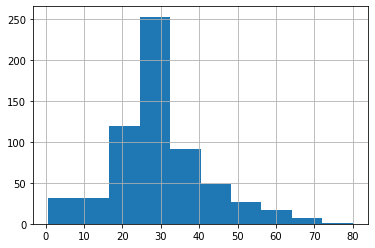

In [85]:
dftrain.age.hist()

<AxesSubplot:>

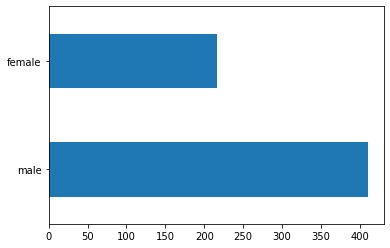

In [86]:
dftrain["sex"].value_counts().plot(kind = "barh")

<AxesSubplot:>

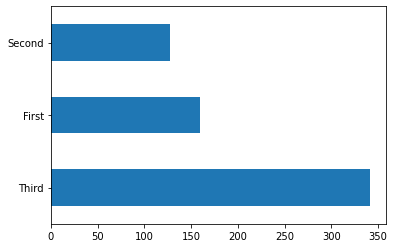

In [87]:
dftrain["class"].value_counts().plot(kind = "barh")

<AxesSubplot:ylabel='sex'>

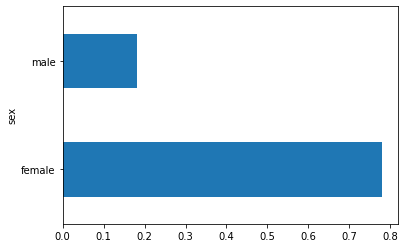

In [88]:
pd.concat([dftrain,y_train],axis = 1).groupby('sex')['survived'].mean().plot(kind = 'barh')

<AxesSubplot:ylabel='class'>

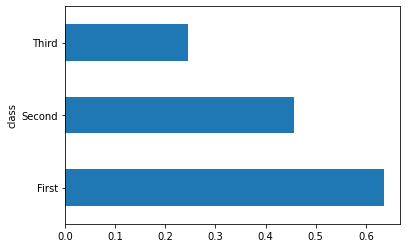

In [89]:
pd.concat([dftrain,y_train],axis = 1).groupby('class')['survived'].mean().plot(kind = 'barh')

In [90]:
CATEGORICAL_COLLUMNS = ['sex', 'n_siblings_spouses','parch','class','deck','embark_town','alone']
NUMERIC_COLLUMNS = ['age', 'fare']


feature_collumns = []

for feature_name in CATEGORICAL_COLLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_collumns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in NUMERIC_COLLUMNS:
    feature_collumns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [95]:
def make_input_fn(data_df, label_df, num_epochs = 10, shuffle = True, batch_size = 32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle == True:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input = make_input_fn(dftrain, y_train)
eval_input = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle= False)

In [96]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_collumns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ILKERE~1\\AppData\\Local\\Temp\\tmppm1p3sxp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [97]:
linear_est.train(train_input)
result = linear_est.evaluate(eval_input)

print(result['accuracy'])

INFO:tensorflow:Calling model_fn.


C:\Users\IlkerErkek\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ILKERE~1\AppData\Local\Temp\tmppm1p3sxp\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 207.164
INFO:tensorflow:loss = 0.39395827, step = 100 (0.485 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into C:\Users\ILKERE~1\AppData\Local\Temp\tmppm1p3sxp\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
INFO:tensorflow:Los

In [98]:
print(result)

{'accuracy': 0.7537879, 'accuracy_baseline': 0.625, 'auc': 0.8320171, 'auc_precision_recall': 0.79463345, 'average_loss': 0.48397332, 'label/mean': 0.375, 'loss': 0.47702965, 'precision': 0.6574074, 'prediction/mean': 0.43221182, 'recall': 0.7171717, 'global_step': 200}


In [103]:
result = list(linear_est.predict(eval_input))
result[0]['probabilities'][0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ILKERE~1\AppData\Local\Temp\tmppm1p3sxp\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.89767563